In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from keras.models import Model
from keras.layers import Dense, Input, Dropout, Conv2D, MaxPool2D, Flatten

from keras.optimizers import Adam
from keras.losses import categorical_crossentropy


from PIL import Image
import PIL.ImageOps

Using TensorFlow backend.


In [2]:
data = pd.read_csv("mnist_train_small.csv")

In [3]:
X = data.values[:,2:].reshape(-1,28,28,1)
y = data.values[:,1]

In [4]:
ohe = OneHotEncoder(categories="auto")

In [5]:
y_hot = ohe.fit_transform(y.reshape(-1,1)).todense()

In [6]:
X[0][0][0][0].shape

()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [46]:
in_layer = Input(shape=[28,28,1],name="inp")
conv_1 = Conv2D(32, (3,3), activation="relu",name="conv1")(in_layer)
pool_1 = MaxPool2D(name="pool1")(conv_1)
conv_2 = Conv2D(64, (3,3), activation="relu",name="conv2")(pool_1)
pool_2 = MaxPool2D(name="pool2")(conv_2)
conv_3 = Conv2D(128, (3,3), activation="relu",name="conv3")(pool_2)
pool_3 = MaxPool2D(name="pool3")(conv_3)

flatten = Flatten(name="flatten1")(pool_3)

dense_1 = Dense(200, activation="tanh",name="dense1")(flatten)

dense_2 = Dense(100, activation="tanh",name="dense2")(dense_1)
drop = Dropout(rate=.25,name="drop1")(dense_2)
dense_3 = Dense(50, activation="relu",name="dense3")(drop)
dense_4 = Dense(50, activation="tanh",name="dense4")(dense_3)

out_1 = Dense(10, activation="softmax",name="out")(dense_4)

In [47]:
model = Model(inputs=[in_layer], outputs=[out_1])

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 64)        18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 3, 3, 128)         73856     
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 1, 1, 128)         0         
__________

In [49]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [50]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
5360/5360 [==============================] - 4s 687us/step - loss: 1.7823 - acc: 0.4174
Epoch 2/10
5360/5360 [==============================] - 3s 558us/step - loss: 0.9143 - acc: 0.7407
Epoch 3/10
5360/5360 [==============================] - 3s 556us/step - loss: 0.5059 - acc: 0.8771
Epoch 4/10
5360/5360 [==============================] - 3s 565us/step - loss: 0.3148 - acc: 0.9224
Epoch 5/10
5360/5360 [==============================] - 3s 546us/step - loss: 0.2229 - acc: 0.9433
Epoch 6/10
5360/5360 [==============================] - 3s 543us/step - loss: 0.1809 - acc: 0.9537
Epoch 7/10
5360/5360 [==============================] - 3s 542us/step - loss: 0.1554 - acc: 0.9582
Epoch 8/10
5360/5360 [==============================] - 3s 534us/step - loss: 0.1347 - acc: 0.9638
Epoch 9/10
5360/5360 [==============================] - 3s 543us/step - loss: 0.1208 - acc: 0.9683
Epoch 10/10
5360/5360 [==============================] - 3s 544us/step - loss: 0.1081 - acc: 0.9713


In [51]:
model.evaluate(X_test, y_test)

2640/2640 [==============================] - 1s 263us/step


[0.15849311830419482, 0.9575757575757575]

In [52]:
# plt.plot(hist.history["dense_20_acc"])
# plt.plot(hist.history["dense_21_acc"])

In [53]:
# plt.plot(hist.history["loss"])
# plt.plot(hist.history["dense_20_loss"])
# plt.plot(hist.history["dense_21_loss"])

In [69]:
m2 = Model(inputs=[in_layer], outputs=[conv_1])

In [70]:
images = m2.predict(X_test[:32])

In [71]:
# images = images.reshape(26,26,32)

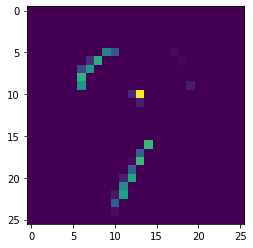

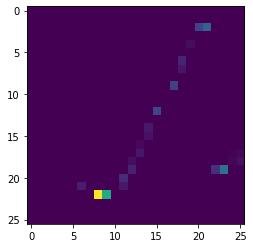

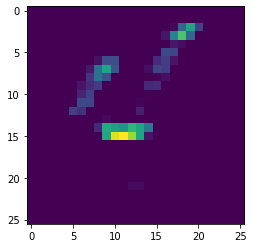

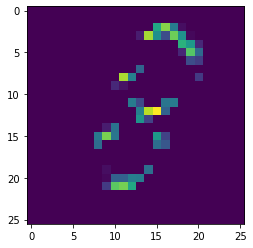

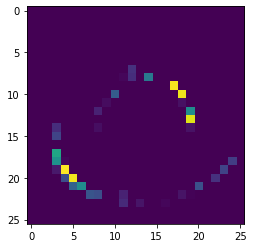

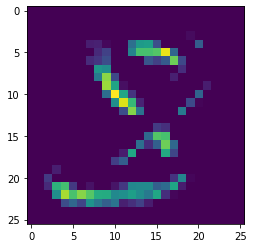

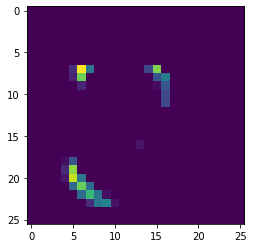

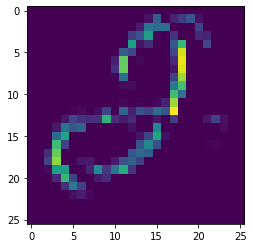

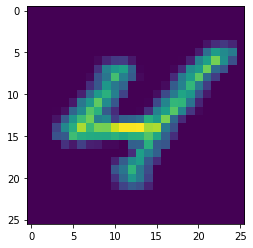

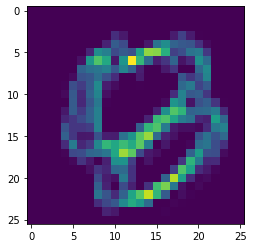

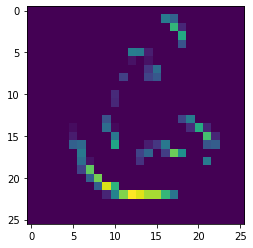

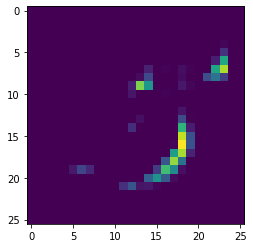

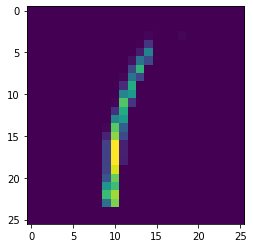

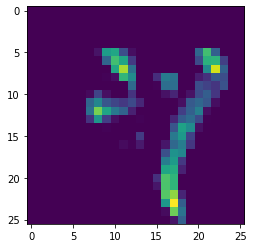

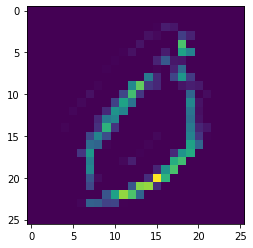

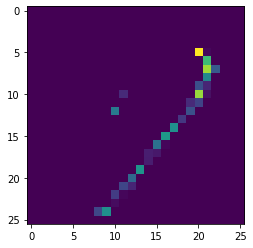

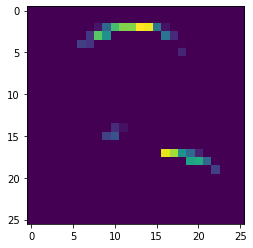

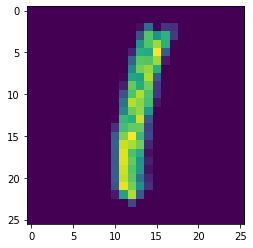

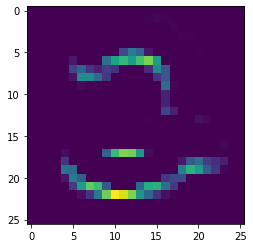

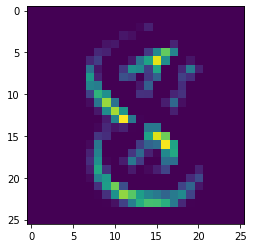

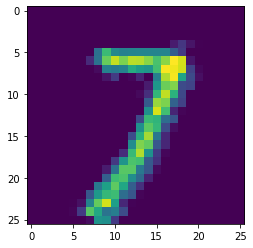

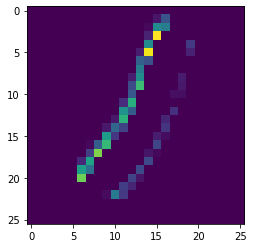

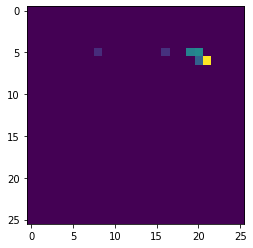

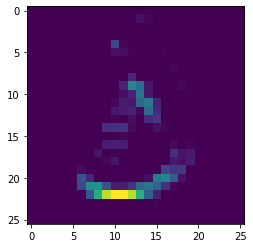

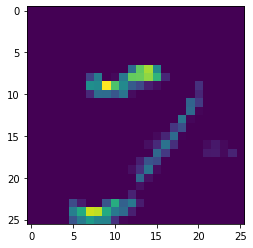

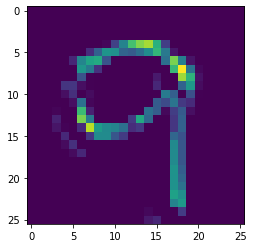

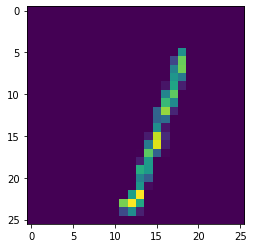

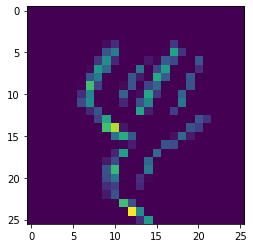

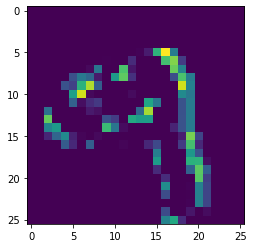

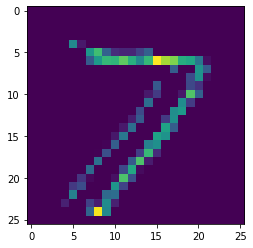

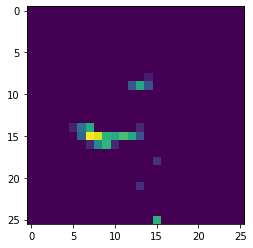

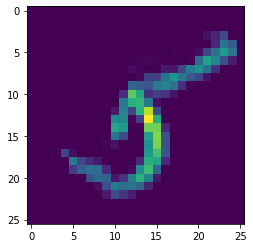

In [72]:
for i in range(32) :
    plt.figure()
    plt.imshow(images[i, :, :, i])
    plt.show()

In [74]:
m3 = Model(inputs=[in_layer], outputs=[conv_2])

In [78]:
images3= m3.predict(X_test[:1])

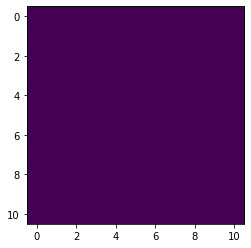

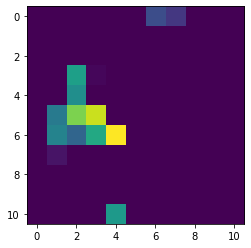

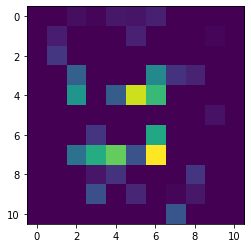

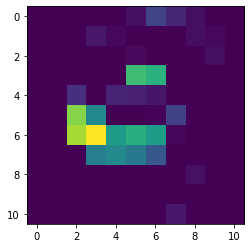

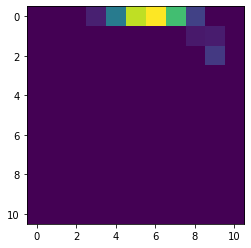

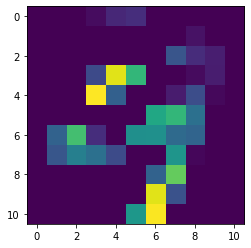

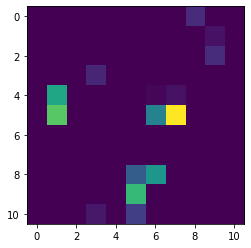

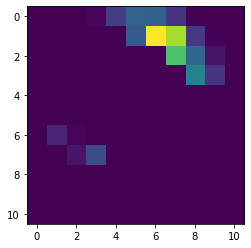

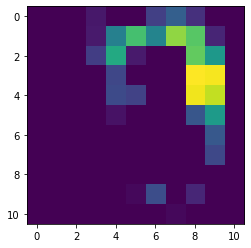

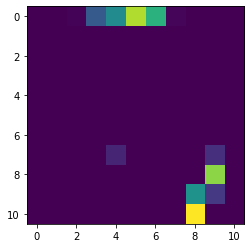

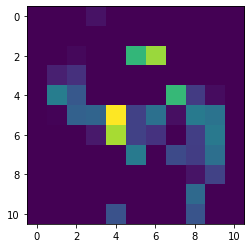

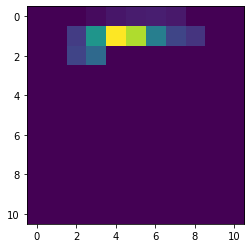

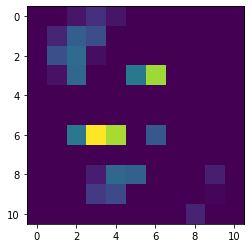

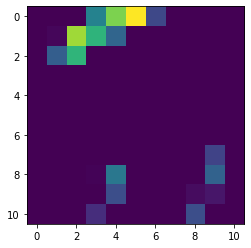

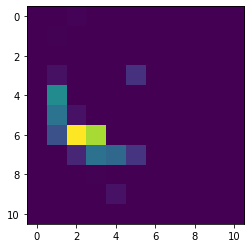

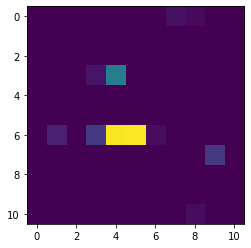

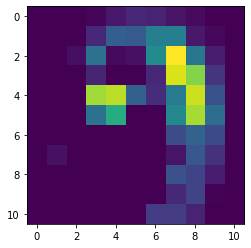

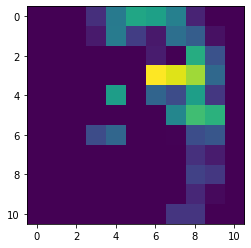

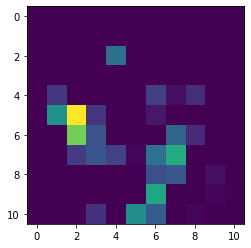

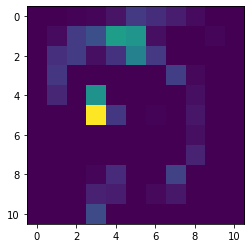

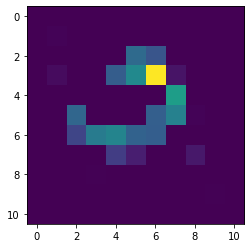

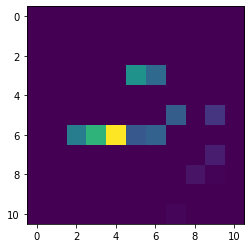

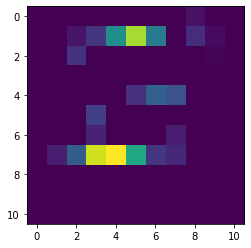

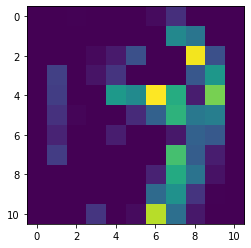

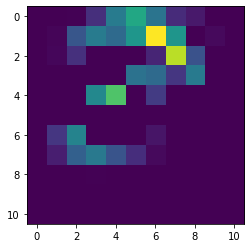

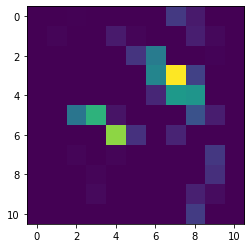

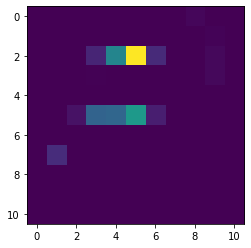

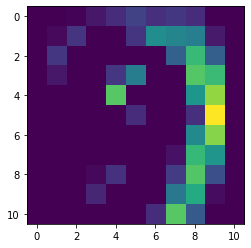

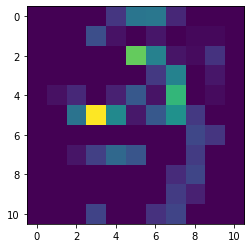

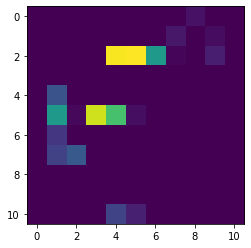

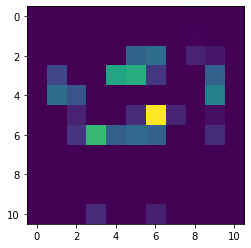

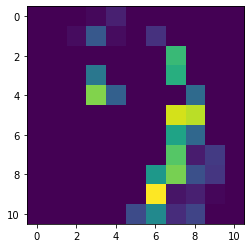

In [79]:
for i in range(32) :
    plt.figure()
    plt.imshow(images3[0, :, :, i])
    plt.show()

In [80]:
m4 = Model(inputs=[in_layer], outputs=[conv_3])

In [81]:
images4 = m4.predict(X_test[:1])

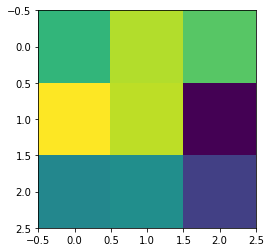

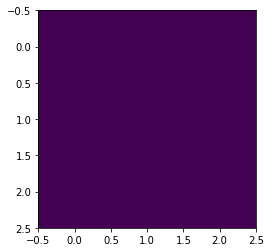

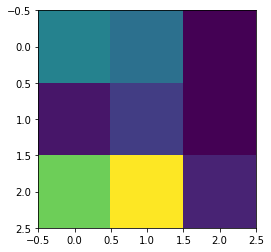

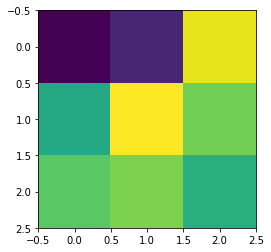

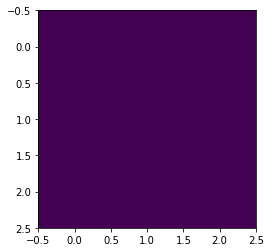

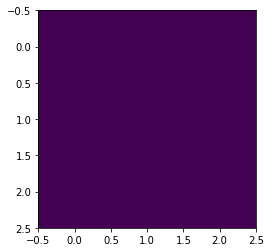

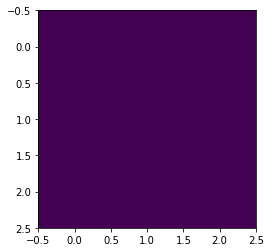

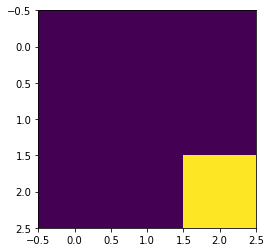

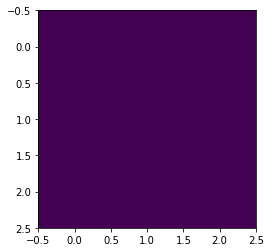

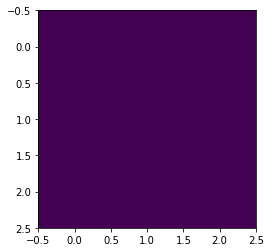

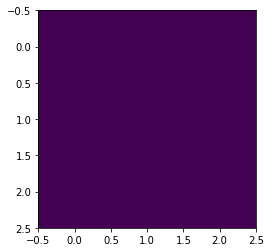

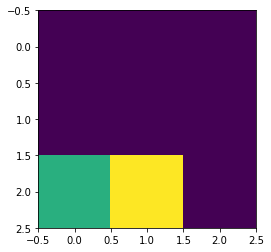

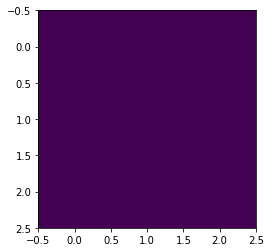

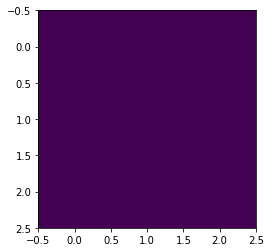

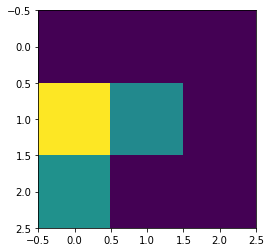

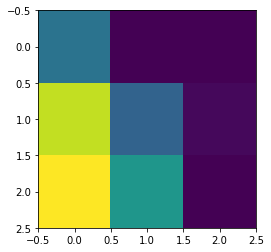

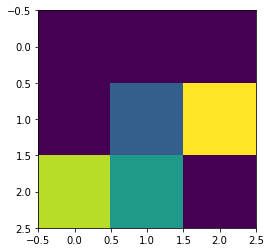

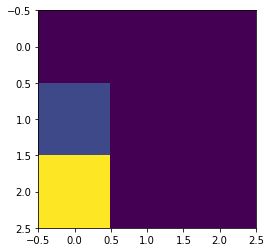

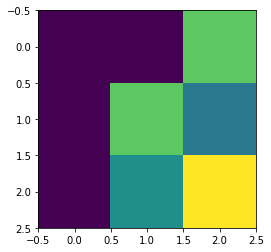

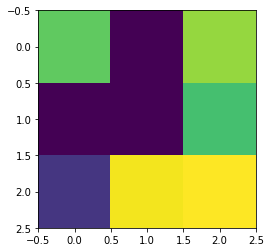

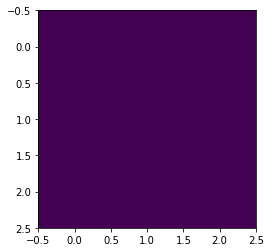

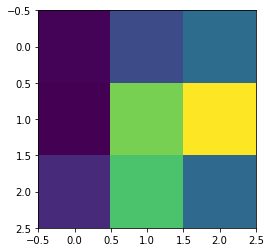

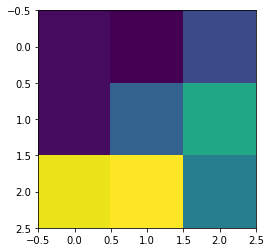

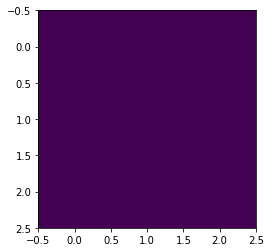

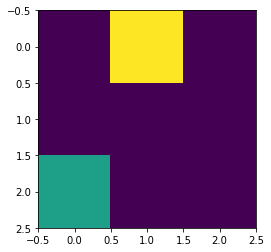

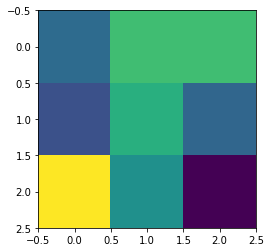

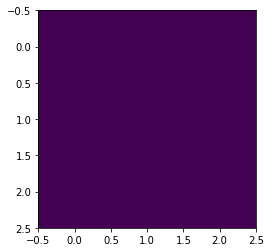

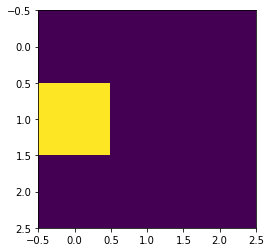

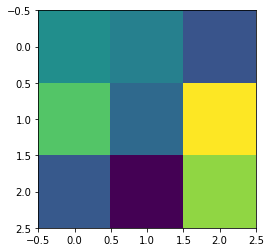

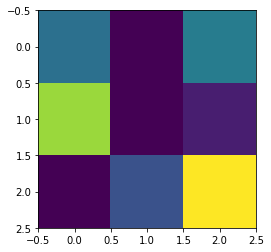

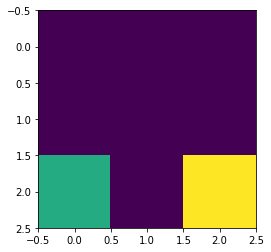

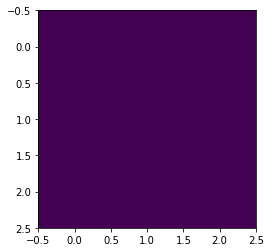

In [82]:
for i in range(32) :
    plt.figure()
    plt.imshow(images4[0, :, :, i])
    plt.show()

In [86]:
m5 = Model(inputs=[in_layer], outputs=[pool_3])

In [87]:
images5 = m5.predict(X_test[:1])

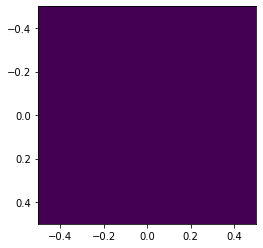

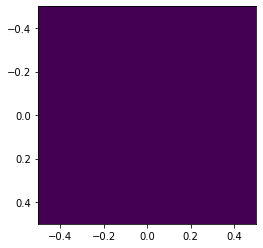

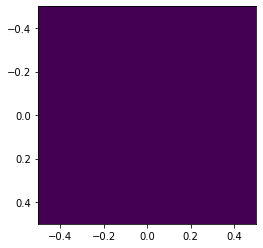

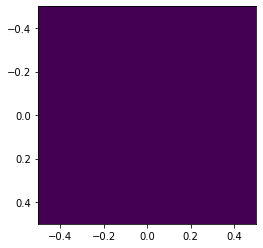

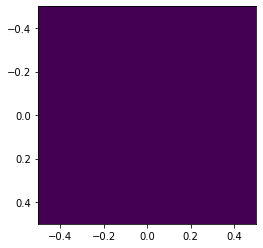

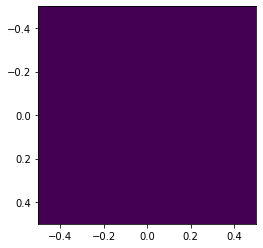

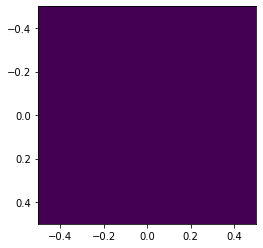

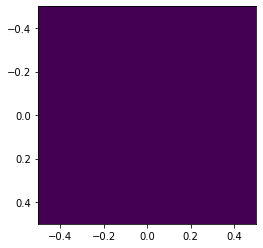

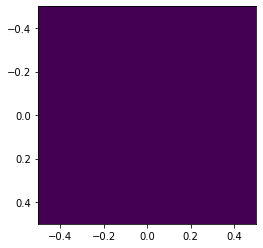

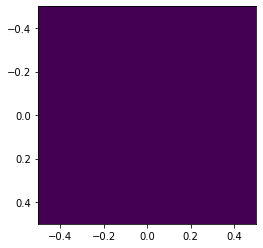

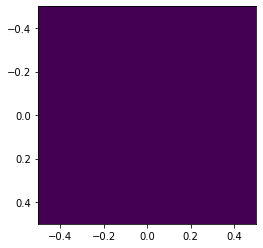

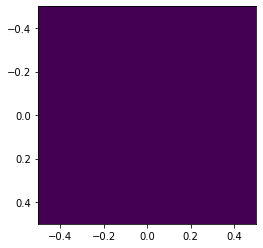

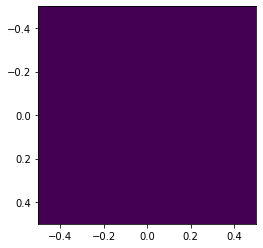

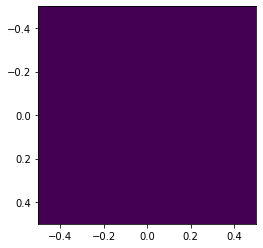

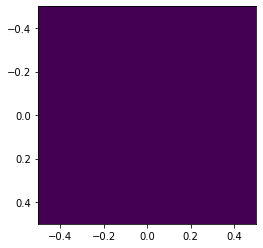

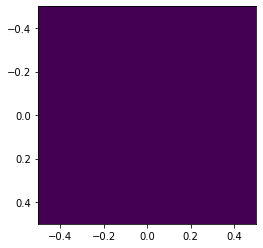

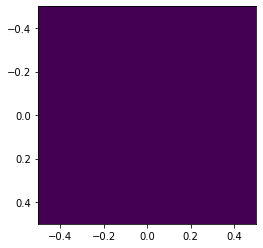

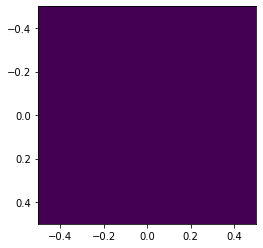

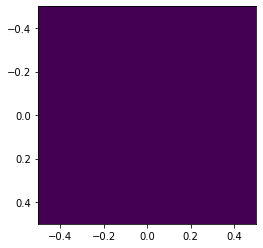

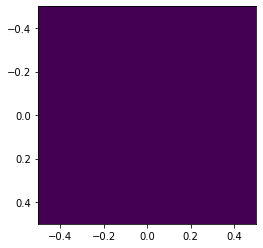

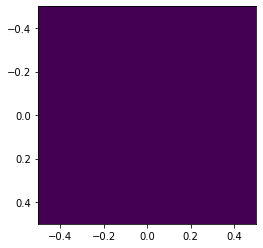

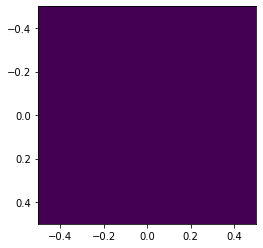

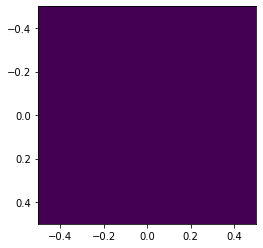

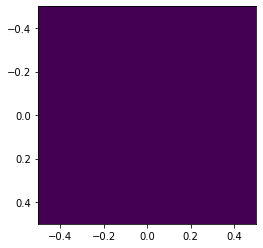

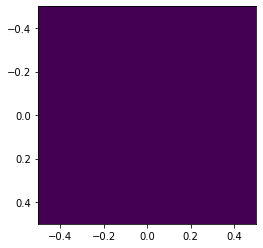

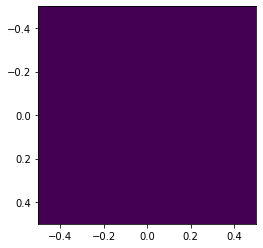

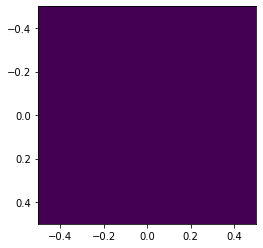

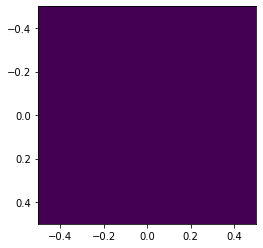

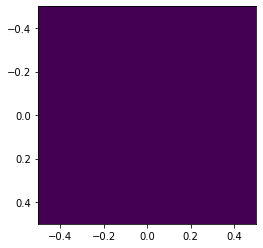

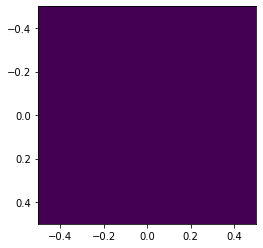

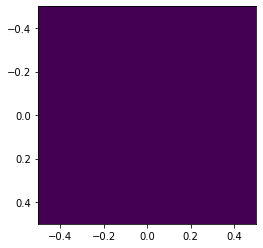

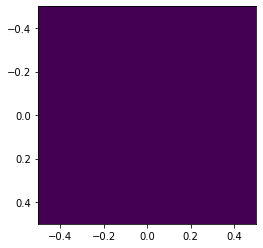

In [88]:
for i in range(32) :
    plt.figure()
    plt.imshow(images5[0, :, :, i])
    plt.show()

In [90]:
selected = model.layers[:-6]

In [103]:


de_1 = Dense(200, activation="tanh",name="de1")(selected[-1].output)

de_2 = Dense(100, activation="tanh",name="de2")(de_1)
dr = Dropout(rate=.25,name="dr")(de_2)
de_3 = Dense(50, activation="relu",name="de3")(dr)
de_4 = Dense(50, activation="tanh",name="de4")(de_3)

oe = Dense(10, activation="softmax",name="oe")(de_4)

In [104]:
transfer_model = Model(inputs=[selected[0].input], outputs=[oe])

In [105]:
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 64)        18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 3, 3, 128)         73856     
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 1, 1, 128)         0         
__________

In [106]:
for layer in selected :
    layer.trainable = False

In [107]:
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 64)        18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 3, 3, 128)         73856     
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 1, 1, 128)         0         
__________

In [108]:
transfer_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [109]:
hist2 = transfer_model.fit(X_train, y_train, epochs=4, batch_size=200)

Epoch 1/4
5360/5360 [==============================] - 2s 300us/step - loss: 1.1416 - acc: 0.7491
Epoch 2/4
5360/5360 [==============================] - 1s 171us/step - loss: 0.2548 - acc: 0.9634
Epoch 3/4
5360/5360 [==============================] - 1s 166us/step - loss: 0.1353 - acc: 0.9707
Epoch 4/4
5360/5360 [==============================] - 1s 163us/step - loss: 0.0943 - acc: 0.9804


In [110]:
transfer_model.evaluate(X_test, y_test)

2640/2640 [==============================] - 1s 291us/step


[0.14039261266589165, 0.9590909090909091]